Question 1  
==
 Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.

In [294]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

file = pd.read_csv('./df1_train.csv', sep =',')

In [39]:
file.shape

(400, 44)

In [40]:
file.head()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,...,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,...,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,...,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,...,0,0,0,1,0,0,0,0,0,0


- Dataset comprises of 400 observations and 44 characteristics.<br>
- Out of which one is dependent variable and rest 43 are independent variables <br>


In [41]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 44 columns):
life_post_consumer            400 non-null int64
comp_page_like                400 non-null int64
Paid                          400 non-null int64
life_post_reach               400 non-null int64
life_post_impression_liked    400 non-null int64
life_post_reach_liked         400 non-null int64
comment                       400 non-null int64
like                          400 non-null int64
share                         400 non-null int64
type_link                     400 non-null int64
type_status                   400 non-null int64
type_video                    400 non-null int64
cat2                          400 non-null int64
cat3                          400 non-null int64
month1                        400 non-null int64
month2                        400 non-null int64
month3                        400 non-null int64
month4                        400 non-null int64
month5       

- Data has only integer values.<br>
- No variable column has null values.<br>


In [44]:
file.describe()

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,0.260000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000,0.037500,...,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248,0.190221,...,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
min,17.000000,81370.000000,0.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,0.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,554.500000,128816.000000,0.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,955.500000,136393.000000,1.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,11328.000000,139441.000000,1.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


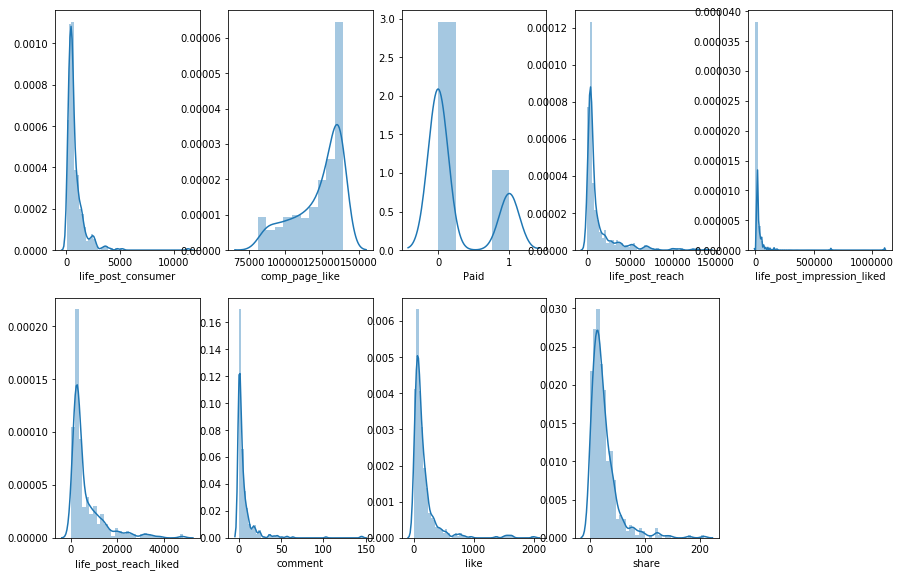

In [98]:
BINARY = ['type_link', 'type_status', 'type_video',]
MONTH = ['month1', 'month2', 'month3', 'month4', 'month5', 
          'month6', 'month7', 'month8', 'month9', 'month10', 'month11']
DOW = ['dow1','dow2','dow3','dow4','dow5','dow6',]
HOUR = ['hour2', 'hour3','hour4','hour5','hour6','hour7','hour8',
          'hour9','hour10','hour11','hour12','hour13','hour14',]
CAT = ['cat2', 'cat3',]

col_num = len(file.columns)
row_num = len(file)
col = list()
for dic, val in file.items():
    col.append(dic)
plt.figure(figsize=(15, 15))
count = 0
for i in range(0,len(col)):
    if col[i] in BINARY or col[i] in MONTH or col[i] in DOW or col[i] in HOUR or col[i] in CAT:
        continue
    plt.subplot(3, 5, count + 1)
    sns.distplot(file[col[i]], kde=True) 
    count += 1


- most of feature are positive skewed , for example :life_post_consumer, life_post_reach, life_post_impression ..., but comp_page_like is negative skewed.<br>


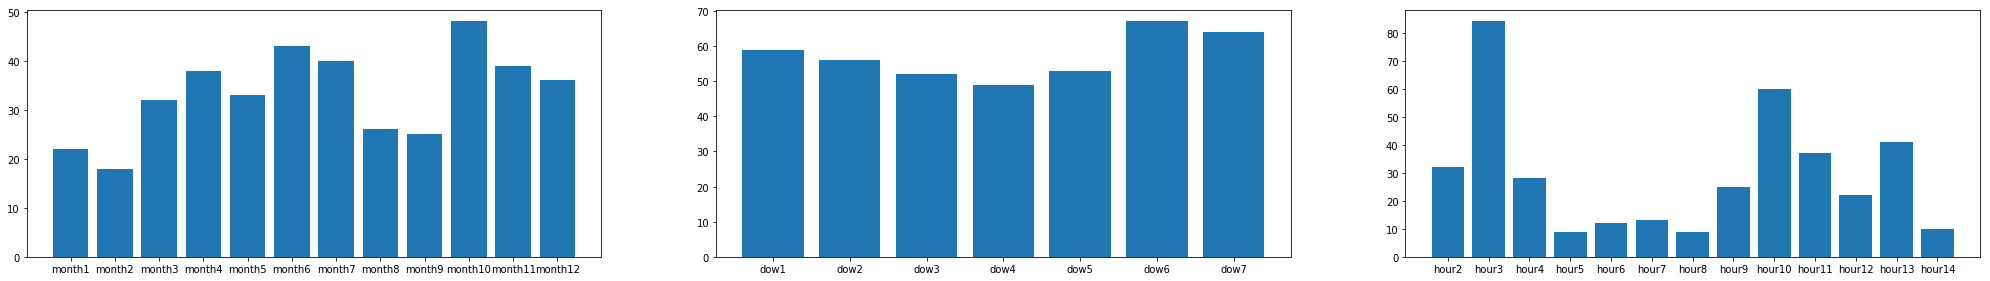

In [124]:
plt.figure(figsize=(35, 10))
count = 0
B_feature ={'month': MONTH, 'day': DOW, 'hour': HOUR}


def binary(col, fea, file):
    ret = dict()
    count = 1
    sums = 0 
    for i in file:
        if i in fea:
            for j in range(len(file)):
                if file[i][j] == 1:
                    if ret.get(count) != None:
                        ret[count] += 1
                    else:
                        ret[count] = 1
                    sums += 1
            count += 1
    if col == 'month':
        ret[12] = len(file) - sums
    elif col == 'day':
        ret[7] = len(file) - sums
    return list(ret.values())


for i, j in B_feature.items():
    plt.subplot(2, 3, count + 1)
    temp = j.copy()
    if i =='month':
        temp.append('month12')
    elif i == 'day':
        temp.append('dow7')
    data = binary(i, j, file)
    plt.bar(temp, data)
    count += 1

    
    


- The first picture shows the distribution of clinking the post in different month in training dataset, and it das most data in October.<br>
- The second picture shows the the distribution of clinking the post in different days.<br>
- The third picture shows the the distribution of clinking the post in different hours, it has most data in hour3.<br>


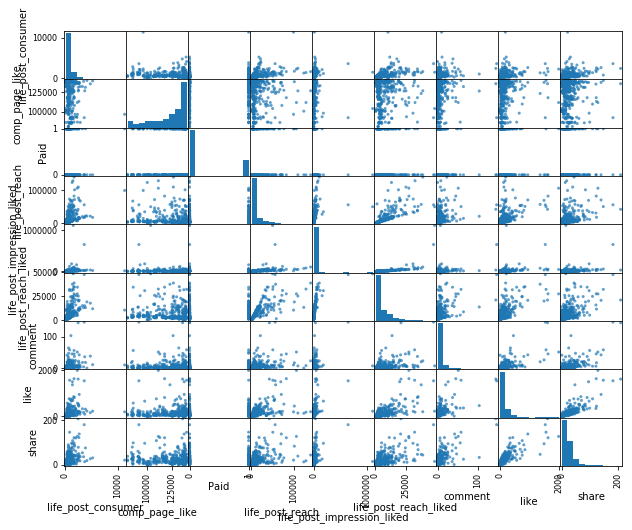

In [553]:
from pandas.plotting import scatter_matrix
attributes = ['life_post_consumer','comp_page_like','Paid','life_post_reach','life_post_impression_liked','life_post_reach_liked','comment','like','share']
data = pd.read_csv('./df1_train.csv', sep =',')
_ = scatter_matrix(data[attributes], figsize=(10,8), alpha=0.7)


- The above picture shows correlation between variables.

Core function in below questions :
==

- def transform(file) : tranfrom data from each feature to individual data

In [275]:
def transform(file):
    ret = list()
    for i, value in file.iterrows():
        temp = list()
        for j in value:
            temp.append(j)
        ret.append(temp)
    return ret

- def de_mean(value, mean) : de_mean method for y value

In [276]:
def de_mean(value, mean):
    return value - mean

- def standardized(data, field = None) : standardized features in training data
- def standardized_testing_data(data, std_fea, field = None): standardized features in testing data

In [529]:
def standardized(data, field = None):
    copy_data = data.copy(deep = True)
    std_fea = dict()
    count = 0
    for key, value in data.items():
        if field != None:
            if key not in field:
                continue
        mean = np.mean(value)
        std = np.std(value)
        std_fea [count] = {'mean': mean, 'std': std}
        temp = list()
        for i in value:
            temp.append((i-mean)/ std)
        copy_data[key] = temp
        count += 1

    return copy_data, std_fea

def standardized_testing_data(data, std_fea, field = None):
    count = 0
    copy_data = data.copy(deep= True)
    for key, value in data.items():
        if field != None:
            if key not in field:
                continue
        temp = list()
        for i in value:
            temp.append( (i - std_fea[count]['mean']) / std_fea[count]['std'])
        copy_data[key] = temp
        count += 1
    return copy_data


- def show_plot(file) : plot the picture

In [541]:
def show_plot(x_axis, y_axis):
    plt.figure(figsize=(5, 4))
    plt.plot(x_axis, y_axis, 'ro',x_axis, y_axis, 'k')
    plt.xlim(-100,1100)
    plt.ylabel('RMSE')
    plt.xlabel('alpha value')
    plt.legend(['test RMSE with respect to α'])
    plt.show()

Common code in below questions :
==

In [554]:
#   Training data process
file = pd.read_csv('./df1_train.csv', sep =',')
y_train = file['life_post_consumer']
y_mean = np.mean(y_train)
file = file.drop('life_post_consumer',  axis=1)
#   Testing data process

test_y = pd.read_csv('./df1_test1y.csv', sep =',')
test_y = test_data['life_post_consumer']
testing_x = pd.read_csv('./df1_test1.csv', sep =',')

Question 2  
==
 Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [531]:
def main():
    RMSE = float()
    num = len(test_y)
    for i in test_y:
        RMSE += ((y_mean - i) **2)
    RMSE = math.sqrt(RMSE / num)
    print("RMSE :" ,RMSE)

if __name__ == '__main__':
    main()

RMSE : 928.809510933216


    index  true value  prediction
    0   1183   810.34
    1   189   810.34
    2   2327   810.34
    3   76   810.34
    4   354   810.34
    5   713   810.34
    6   204   810.34
    7   288   810.34
    8   555   810.34
    9   586   810.34
    10   446   810.34
    11   884   810.34
    12   524   810.34
    13   672   810.34
    14   23   810.34
    15   570   810.34
    16   1361   810.34
    17   5934   810.34
    18   2319   810.34
    19   1633   810.34
    
    RMSE : 928.809510933216

Question 3  
==
Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [550]:
from sklearn.linear_model import LinearRegression


def main():
    x_train = transform(file)
    reg = LinearRegression().fit(x_train, y_train)
    test_x = transform(testing_x)    
    RMSE = float()
    num = len(test_x)
    for i in range(len(test_x)):
        predict_y = reg.predict([test_x[i]])
        RMSE += ((predict_y[0]- test_y[i]) **2 )
    RMSE = math.sqrt(RMSE / num)
    print("RMSE :" , RMSE)


if __name__ == '__main__':
    main()

RMSE : 692.289127136201


    index  true value  prediction
    0   1183   781.5799150705279
    1   189   315.9204311198173
    2   2327   2279.084852401181
    3   76   -136.34286372729912
    4   354   302.35624062148236
    5   713   462.42402367948125
    6   204   321.67770824369654
    7   288   504.52244767621596
    8   555   505.8954710411417
    9   586   488.36700578015916
    10   446   392.6142351937797
    11   884   388.9184670987779
    12   524   804.8752750894855
    13   672   634.3236443157402
    14   23   176.31765618431564
    15   570   645.7291380968691
    16   1361   1983.5385887130597
    17   5934   3144.39710045439
    18   2319   4060.61071217642
    19   1633   4288.223080997648
    RMSE : 692.289127136201

Question 4
==
 Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [549]:
from sklearn.linear_model import LinearRegression


def main():
    de_y_train = [de_mean(value, y_mean) for value in y_train]
    x_train = transform(file)
    reg = LinearRegression().fit(x_train, de_y_train)
    test_x = transform(testing_x)
    
    RMSE = float()
    num = len(test_x)
    for i in range(len(test_x)):
        predict_y = reg.predict([test_x[i]])
        predict_y += y_mean
        RMSE += ((predict_y[0]- test_y[i]) **2 )
    RMSE = math.sqrt(RMSE / num)
    print("RMSE :" , RMSE)


if __name__ == '__main__':
    main()

RMSE : 692.289127136183


    index  true value  prediction
    0   1183   781.5799150699094
    1   189   315.9204311202519
    2   2327   2279.0848524010544
    3   76   -136.34286372688814
    4   354   302.3562406218442
    5   713   462.4240236797067
    6   204   321.6777082440493
    7   288   504.5224476766251
    8   555   505.89547104143264
    9   586   488.36700578043735
    10   446   392.61423519413063
    11   884   388.91846709911067
    12   524   804.8752750898637
    13   672   634.3236443160184
    14   23   176.31765618468842
    15   570   645.7291380971382
    16   1361   1983.538588713188
    17   5934   3144.397100453739
    18   2319   4060.6107121746045
    19   1633   4288.223080997546
    RMSE : 692.289127136183

Question 5
==
Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [534]:
from sklearn.linear_model import LinearRegression

def main():
    de_y_train = [de_mean(value, y_mean) for value in y_train]
    x_train, std_fea = standardized(file)
    x_train_std = transform(x_train)
    
    reg = LinearRegression().fit(x_train_std, de_y_train)

    test_x = standardized_testing_data(testing_x, std_fea)
    test_x_std = transform(test_x)
    RMSE = float()
    num = len(test_x)
    for i in range(len(test_x)):
        predict_y = reg.predict([test_x_std[i]])
        predict_y += y_mean

        RMSE += ((predict_y[0]- test_y[i]) **2 )
    RMSE = math.sqrt(RMSE / num)
    print("RMSE :" ,RMSE)


if __name__ == '__main__':
    main()

RMSE : 692.2891271372011


    index  true value  prediction
    0   1183   781.5799150726222
    1   189   315.9204311196464
    2   2327   2279.084852399017
    3   76   -136.34286372742895
    4   354   302.35624062146786
    5   713   462.4240236767462
    6   204   321.6777082438836
    7   288   504.5224476732227
    8   555   505.8954710383022
    9   586   488.3670057801715
    10   446   392.61423519384925
    11   884   388.9184670986667
    12   524   804.8752750893709
    13   672   634.3236443159309
    14   23   176.31765618415238
    15   570   645.729138094038
    16   1361   1983.5385887135385
    17   5934   3144.3971004532405
    18   2319   4060.610712187088
    19   1633   4288.223081003462
    RMSE : 692.2891271372011

Question 6 
==
Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

Best alpha 10 , RMSE: 660.5612900111676


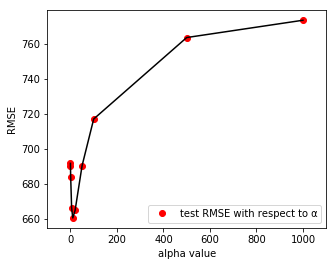

In [547]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

ALPHA = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]


def main():
    x_train = transform(file)
    min_alpha = -1
    min_RMSE = 100000
    min_output = []
    all_RMSE = []
    test_x = transform(testing_x)
    for a in ALPHA:
        clf = Ridge(alpha = a)
        clf.fit(x_train, y_train)
        RMSE = float()
        num = len(test_x)
        pred_res = []
        for i in range(len(test_x)):
            predict_y = clf.predict([test_x[i]])
            RMSE += ((predict_y[0]- test_y[i]) **2 )
            pred_res.append((test_y[i], predict_y[0]))
        RMSE = math.sqrt(RMSE / num)
        all_RMSE.append(RMSE)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_output = pred_res
            min_alpha = a
    print('Best alpha' ,min_alpha, ', RMSE:' ,min_RMSE)
    show_plot(ALPHA, all_RMSE)
    

if __name__ == '__main__':
    main()

    Best alpha 10 , RMSE: 660.5612900111676
    index  true value  prediction
    0   1183   1068.3336238492388
    1   189   229.7553191998402
    2   2327   2008.5588919213274
    3   76   -102.87489949962946
    4   354   541.4576994726492
    5   713   606.4592575585214
    6   204   414.9827982946779
    7   288   602.8105144219186
    8   555   500.18438507612973
    9   586   492.30663558106335
    10   446   508.37649961334796
    11   884   409.1300215282547
    12   524   730.4676804339108
    13   672   561.0603282026213
    14   23   294.4508972276835
    15   570   602.4828674601829
    16   1361   1632.1827150344577
    17   5934   2698.882817822703
    18   2319   3841.631528462284
    19   1633   3892.400909026031
    

Question 7
==
Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

Best alpha 20 , RMSE: 645.5168123938743


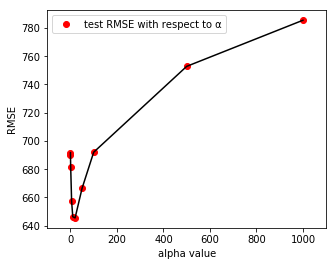

In [559]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


ALPHA = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
X_CONTINUE =['comp_page_like', 'life_post_reach','life_post_impression_liked','life_post_reach_liked', 'comment', 'like', 'share']


def main():    
    de_y_train = [de_mean(value, y_mean) for value in y_train]
    x_train, std_fea = standardized(file, X_CONTINUE)
    x_train = transform(x_train)
    min_alpha = -1
    min_RMSE = 100000
    min_output = []
    all_RMSE = []

    test_x = standardized_testing_data(testing_x, std_fea, X_CONTINUE)
    test_x = transform(test_x)
    for a in ALPHA:
        clf = Ridge(alpha = a)
        clf.fit(x_train, de_y_train)
        RMSE = float()
        num = len(test_x)
        pred_res = []
        for i in range(len(test_x)):
            predict_y = clf.predict([test_x[i]])
            predict_y[0] += y_mean
            RMSE += ((predict_y[0]- test_y[i]) **2 )
            pred_res.append((test_y[i], predict_y[0]))
        RMSE = math.sqrt(RMSE / num)
        all_RMSE.append(RMSE)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_output = pred_res
            min_alpha = a  
    print('Best alpha' ,min_alpha, ', RMSE:' ,min_RMSE)
    show_plot(ALPHA, all_RMSE)
    
if __name__ == '__main__':
    main()

    Best alpha 20 , RMSE: 645.5168123938743
    index  true value  prediction
    0   1183   1142.269542340836
    1   189   254.15701492111555
    2   2327   1834.0248894378178
    3   76   15.7181687040528
    4   354   599.7636629205396
    5   713   635.940389843943
    6   204   427.856444157903
    7   288   603.6620598910195
    8   555   514.5237878678298
    9   586   580.0010600720792
    10   446   544.3417602098276
    11   884   477.1844208388861
    12   524   801.5455454188348
    13   672   557.4528723791399
    14   23   396.27886547830843
    15   570   615.151524115246
    16   1361   1474.6741737563507
    17   5934   2504.864372734998
    18   2319   3524.8596448111243
    19   1633   3438.4034371349417
    

Question 8
==
Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

Best alpha 10 , RMSE: 660.5612900111677


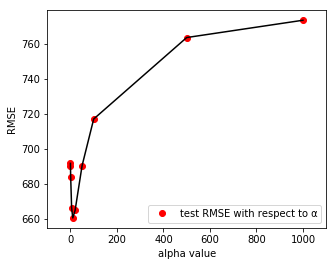

In [544]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

ALPHA = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]


def main():
    de_y_train = [de_mean(value, y_mean) for value in y_train]
    x_train = transform(file)
    test_x = transform(testing_x)
    min_alpha = -1
    min_RMSE = 100000
    min_output = []
    all_RMSE = []
    for a in ALPHA:
        clf = Ridge(alpha = a)
        clf.fit(x_train, de_y_train)
        RMSE = float()
        num = len(test_x)
        pred_res = []
        for i in range(len(test_x)):
            predict_y = clf.predict([test_x[i]])
            predict_y += y_mean
            RMSE += ((predict_y[0]- test_y[i]) **2 )
            pred_res.append((test_y[i], predict_y[0]))
        RMSE = math.sqrt(RMSE / num)
        all_RMSE.append(RMSE)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_output = pred_res
            min_alpha = a
    print('Best alpha' ,min_alpha, ', RMSE:' ,min_RMSE)
    show_plot(ALPHA, all_RMSE)
if __name__ == '__main__':
    main()

    Best alpha 10 , RMSE: 660.5612900111677
    index  true value  prediction
    0   1183   1068.3336238492384
    1   189   229.7553191998402
    2   2327   2008.5588919213274
    3   76   -102.87489949962946
    4   354   541.4576994726497
    5   713   606.4592575585215
    6   204   414.98279829467856
    7   288   602.8105144219186
    8   555   500.1843850761295
    9   586   492.3066355810638
    10   446   508.37649961334773
    11   884   409.13002152825493
    12   524   730.467680433911
    13   672   561.0603282026213
    14   23   294.450897227684
    15   570   602.4828674601825
    16   1361   1632.182715034457
    17   5934   2698.8828178227022
    18   2319   3841.631528462285
    19   1633   3892.4009090260324
    

Question 9
==
Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

Best alpha 100 , RMSE: 588.7934657527675


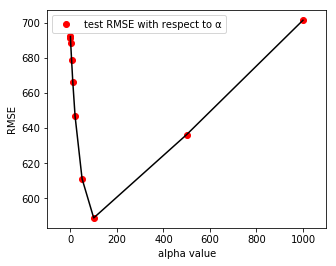

In [545]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


ALPHA = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
X_CONTINUE =['comp_page_like', 'Paid', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share', 'type_link', 'type_status', 'type_video', 'cat2', 'cat3', 'month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14']


def main():    
    de_y_train = [de_mean(value, y_mean) for value in y_train]
    x_train, std_fea = standardized(file, X_CONTINUE)
    x_train = transform(x_train)
    test_x = standardized_testing_data(testing_x, std_fea, X_CONTINUE)
    test_x = transform(test_x)
    min_alpha = -1
    min_RMSE = 100000
    min_output = []
    all_RMSE = []
    for a in ALPHA:
        clf = Ridge(alpha = a)
        clf.fit(x_train, de_y_train)
        RMSE = float()
        num = len(test_x)
        pred_res = []
        for i in range(len(test_x)):
            predict_y = clf.predict([test_x[i]])
            predict_y[0] += y_mean
            RMSE += ((predict_y[0]- test_y[i]) **2 )
            pred_res.append((test_y[i], predict_y[0]))
        RMSE = math.sqrt(RMSE / num)
        all_RMSE.append(RMSE)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_output = pred_res
            min_alpha = a
    print('Best alpha' ,min_alpha, ', RMSE:' ,min_RMSE)
    show_plot(ALPHA, all_RMSE)
    
if __name__ == '__main__':
    main()

    Best alpha 100 , RMSE: 588.7934657527675
    index  true value  prediction
    0   1183   1040.5001226108077
    1   189   278.46504979771976
    2   2327   1997.7244642700311
    3   76   -21.140365018158377
    4   354   554.215257097454
    5   713   602.8406419024143
    6   204   337.5234695915472
    7   288   599.4357852626595
    8   555   470.29370415993543
    9   586   500.7241404018721
    10   446   511.14861912035354
    11   884   387.74355349650733
    12   524   700.0895765181294
    13   672   532.222809691993
    14   23   255.18311778364364
    15   570   653.3563783030604
    16   1361   1728.1691916931386
    17   5934   2775.002710950042
    18   2319   3174.7922518929386
    19   1633   3141.857976088331
    

Question 10
==
Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best alpha 10 , RMSE: 643.3838482161635


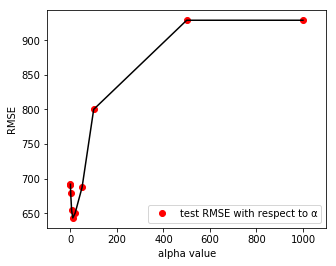

In [546]:
from sklearn import linear_model
import matplotlib.pyplot as plt


ALPHA = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
X_CONTINUE =['comp_page_like', 'life_post_reach','life_post_impression_liked','life_post_reach_liked', 'comment', 'like', 'share']


def main():    
    de_y_train = [de_mean(value, y_mean) for value in y_train]
    
    x_train, std_fea = standardized(file, X_CONTINUE)
    x_train = transform(x_train)
    test_x = standardized_testing_data(testing_x, std_fea, X_CONTINUE)
    test_x = transform(test_x)
    min_alpha = -1
    min_RMSE = 100000
    min_output = []
    all_RMSE = []
    for a in ALPHA:
        clf = linear_model.Lasso(alpha=a)
        clf.fit(x_train, de_y_train)
        RMSE = float()
        num = len(test_x)
        pred_res = []
        for i in range(len(test_x)):
            predict_y = clf.predict([test_x[i]])
            predict_y[0] += y_mean
            RMSE += ((predict_y[0]- test_y[i]) **2 )
            pred_res.append((test_y[i], predict_y[0]))
        RMSE = math.sqrt(RMSE / num)
        all_RMSE.append(RMSE)
        if RMSE < min_RMSE:
            min_RMSE = RMSE
            min_output = pred_res
            min_alpha = a
    print('Best alpha' ,min_alpha, ', RMSE:' ,min_RMSE)
    show_plot(ALPHA, all_RMSE)
if __name__ == '__main__':
    main()

    Best alpha 10 , RMSE: 643.3838482161635
    index  true value  prediction
    0   1183   1241.5985849255558
    1   189   287.8887606165928
    2   2327   2119.9067473192517
    3   76   -16.297183263599322
    4   354   449.1011506081874
    5   713   711.1455910838515
    6   204   398.0591741482581
    7   288   460.1512424769557
    8   555   645.442997528316
    9   586   591.436454261299
    10   446   429.96619299796015
    11   884   461.4831520725559
    12   524   899.8092875270692
    13   672   571.8664062109583
    14   23   352.8652196795029
    15   570   548.0853247508958
    16   1361   1741.0151105636191
    17   5934   2712.054391668527
    18   2319   3681.459427440289
    19   1633   3645.1140330675935
    

Question 11
==
Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?


    Case	Method	x_continue	x_binary	y        RMSE
    1	   ymean	  not used	not used    keep      928.809510933216   
    2A	   OLS	    keep	      keep	 keep      692.289127136201
    2B	   OLS	    keep	      keep	 de-mean   692.289127136183     
    2C	   OLS	    std.	      std.	 de-mean   692.2891271372011     
    3A	  Ridge	   keep	      keep	 keep      660.5612900111676
    3B	  Ridge	   std.	      keep	 de-mean   645.5168123938743 (Best alpha = 20)
    3C	  Ridge	   keep	      keep	 de-mean   660.5612900111677 (Best alpha = 10)       
    3D	  Ridge	   std.	      std.	 de-mean   588.7934657527675 (Best alpha = 100)   
    4	   Lasso	   std.	      keep	 de-mean   643.3838482161635 (Best alpha = 10 )      

1. The best RMSE of all cases is using Ridge regression method with standardized x_binary and x_continue (3D). 
2. While de_meaning for y does not effect the prediction result (almost same RMSE) but change the coefficient value.
3. We should perform standardization to make sure bettter prediction